In [8]:
import pandas as pd
df = pd.read_csv('/TextMessages.csv')
df = df[pd.notnull(df['Body'])]
df.info()

FileNotFoundError: [Errno 2] No such file or directory: '/TextMessages.csv'

In [2]:
col = ['Catogory', 'Body']
df = df[col]
df.columns

Index(['Catogory', 'Body'], dtype='object')

In [3]:
df.columns = ['Catogory', 'Body']

In [4]:
df['category_id'] = df['Catogory'].factorize()[0]
from io import StringIO
category_id_df = df[['Catogory', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Catogory']].values)

In [5]:
df.head()
#displays first 5 rows

,Catogory,Body,category_id
0,PROMOTION,"Dear Customer, catch the World Digital Premier...",0
1,PROMOTION,"Dear Patron,You have an Avantra by Trends vouc...",0
2,PROMOTION,"Dear Customer,Big Summer Sale on JioMart. Get ...",0
3,PROMOTION,"Maansarovar Honda: Dear Customer, insurance re...",0
4,PROMOTION,Order for Cons No 7100006044 is registered wit...,0


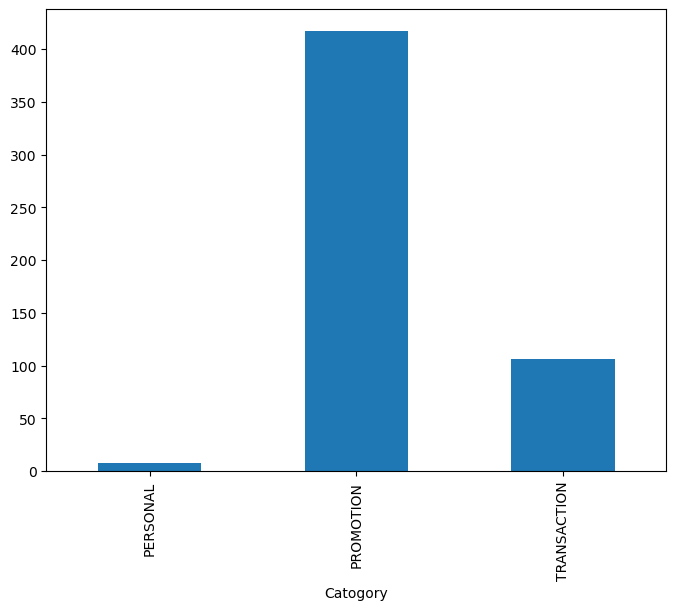

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Catogory').Body.count().plot.bar(ylim=0)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
df = df.dropna(how='any',axis=0)
df = df.dropna(how='any',axis=1)
X_train, X_test, y_train, y_test = train_test_split(df['Body'], df['Catogory'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
print(clf.predict(count_vect.transform(["You got a call from Caratlane Please rate the call https://fb.myo.bz/hP1Er Also, report spam call -via MYOPERATOR"])))

['PROMOTION']


In [9]:
import os

notebook_path = os.getcwd()
print(notebook_path)

C:\Users\BATH\BalajiML\TextMessageClassification
